## Preparing input data for a model to differentiate between muons, electrons and alpha particles

In this notebook, we prepare the input data that will be feeded to a convolutional neural network to classify a signal as electron or muon. So first of all, we wil get all the electron files from the `cropped_electrons4` directory and we will separate this array into two: one for the energy and the other one for the noise. And then, we will get the muon files from the `cropped_muons4` directory and the alpha files from `cropped_alphas4` directory, and we will proceed similary. The aim of this notebook is to pad all energy images and crop all noise images to the size of the maximum window.

* [Padding electrons](#Padding-electrons)
* [Padding muons](#Padding-muons)
* [Padding alphas](#Padding-alphas)

In [1]:
import glob
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

Once all the figures are cropped, all of them must have the same size which will correspond to the maxium window shape calculated before for the electrons

In [7]:
window_x, window_y = 192, 242

#this function will be only applied to the energy of the particle, not the noise
def padding_energy(array):
    
    y, x = window_y, window_x  #y,x is the size of the maximum window
    y_image = array.shape[0]
    x_image = array.shape[1]
    
    if y-y_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    elif x-x_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    else:
        #generating random numbers to pad the energy image
        random1 = np.random.randint(0, y-y_image)
        random2 = np.random.randint(0, x-x_image)
    
        #padding
        reshaped = np.pad(array, ((random1, y-y_image-random1), (random2, x-x_image-random2)),  constant_values=0)
    return reshaped

#this function will be applied to the noise of the signal to crop the image
def cropping_noise(array):
    
    y, x = window_y, window_x
    reshaped = array[0:window_y, 0:window_x]
    return reshaped

In [2]:
e_dir = '/gpfs/projects/damic/cropped_electrons4'
mu_dir = '/gpfs/projects/damic/cropped_muons4'
a_dir = '/gpfs/projects/damic/cropped_alphas4'

### Padding electrons

In [ ]:
#reshaping both energy and noise electron images, so they can be the same size

dest = e_dir

#list of the files in the original dataset
files = os.listdir(dest)

#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(dest, files[index]))['energy'] 
    noise_a = np.load(os.path.join(dest, files[index]))['noise']
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_a, noise=noise_a)

This is an example of the process on an image:

* First, we display the original picture

Text(0.5, 1.0, 'Electron energy')

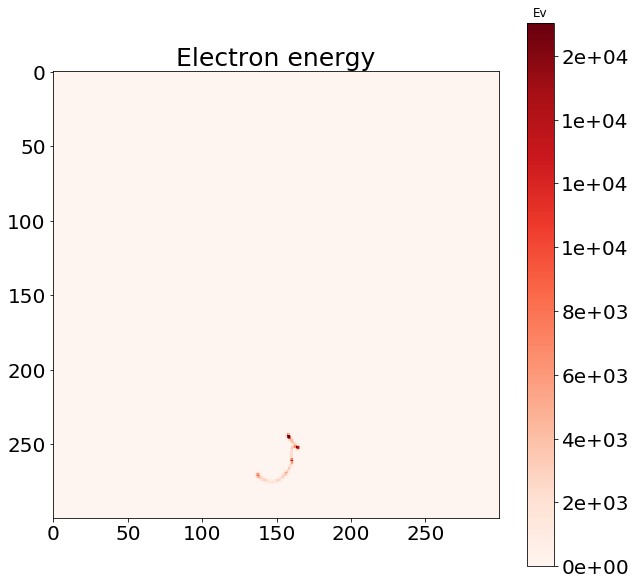

In [5]:
original_dataset_dir = '/gpfs/res_scratch/damic/TFM_DM/CCDimg_fullNoise'

files = glob.glob1(original_dataset_dir,"*11.npz")
f=4
e = np.load(os.path.join(original_dataset_dir, files[f]))['energy']

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize = 25)

* Then, the cropped energy image

Text(0.5, 1.0, 'Electron track')

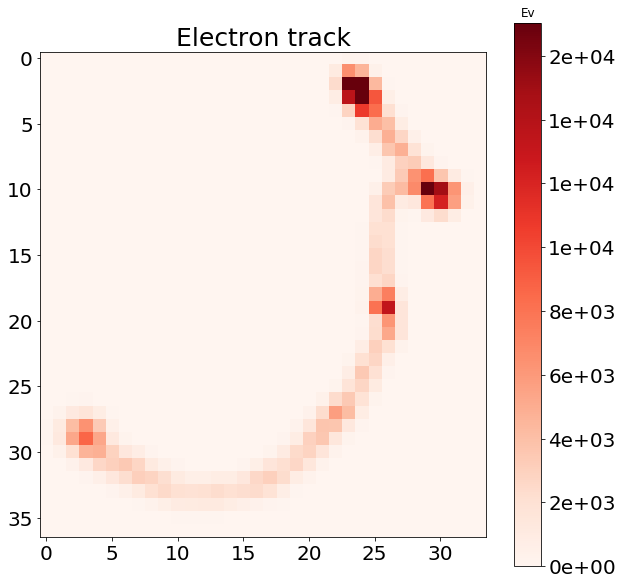

In [6]:
coords = np.argwhere(e)
y_min, x_min = coords.min(axis=0)
y_max, x_max = coords.max(axis=0)
e_b = e[y_min:y_max+1, x_min:x_max+1]

fig_e_b = plt.figure(figsize=(10,10))
plt.imshow(e_b, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('Ev')
plt.title("Electron track", fontsize=25)

In [7]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a/cropped_tracks'
fig_e_b.savefig(myPath + '/energy_e_c.png')

* Finally, the padded energy image for the electron:

Text(0.5, 1.0, 'Electron energy')

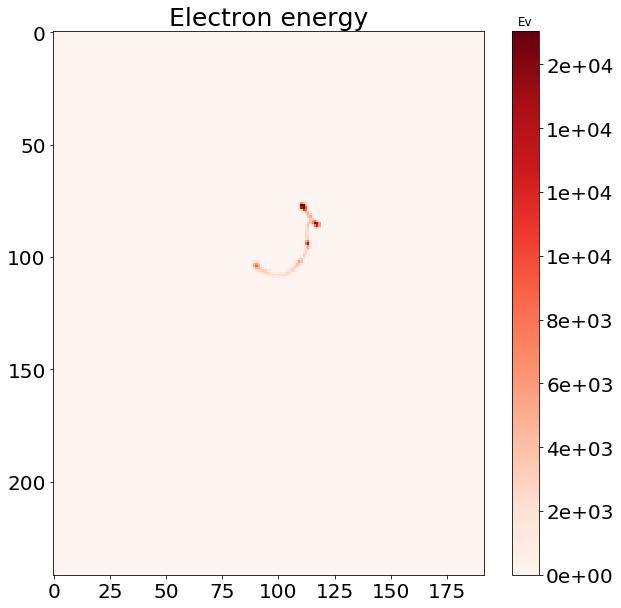

In [8]:
files = glob.glob1(e_dir,"*11.npz")
f=4
e = np.load(os.path.join(e_dir, files[f]))['energy']
n = np.load(os.path.join(e_dir, files[f]))['noise']


fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('Ev')
plt.title("Electron energy", fontsize=25)

In [9]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a/cropped_tracks'
fig_e.savefig(myPath + '/energy_e_padded.png')

Text(0.5, 1.0, 'Noise in the electron signal')

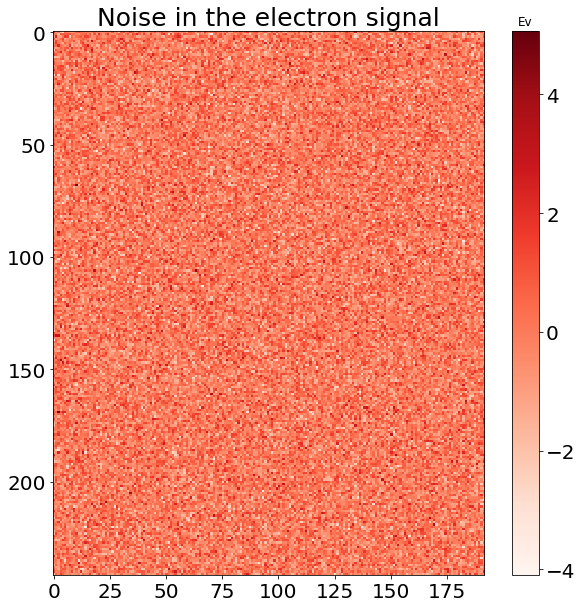

In [10]:
fig_e_d = plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('Ev')
plt.title("Noise in the electron signal", fontsize=25)

In [11]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a/cropped_tracks'
fig_e_d.savefig(myPath + '/noise_e_padded.png')

### Padding muons

In [ ]:
#reshaping both energy and noise muon images, so they can be the same size
dest = mu_dir

#list of the files in the original dataset
files = os.listdir(dest)

#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(dest, files[index]))['energy'] 
    noise_a = np.load(os.path.join(dest, files[index]))['noise']
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_a, noise=noise_a)

Text(0.5, 1.0, 'Muon energy')

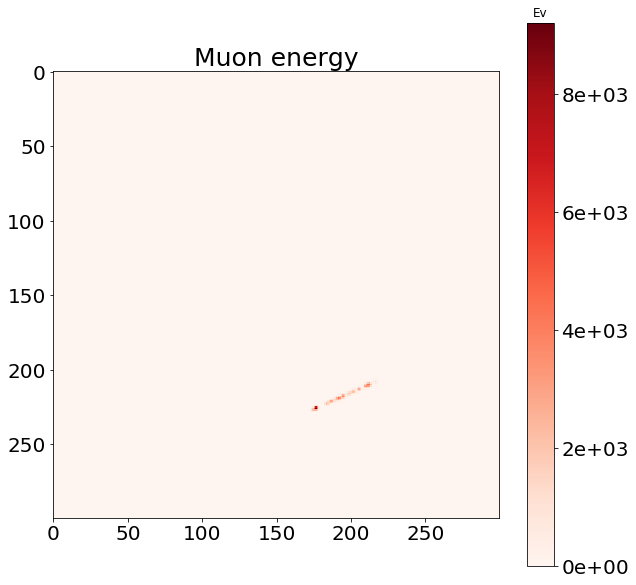

In [3]:
original_dataset_dir = '/gpfs/res_scratch/damic/TFM_DM/CCDimg_fullNoise'
files = glob.glob1(original_dataset_dir,"*13.npz")
f=3453
mu = np.load(os.path.join(original_dataset_dir, files[f]))['energy']

fig_mu = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Muon energy", fontsize = 25)

Text(0.5, 1.0, 'Muon energy')

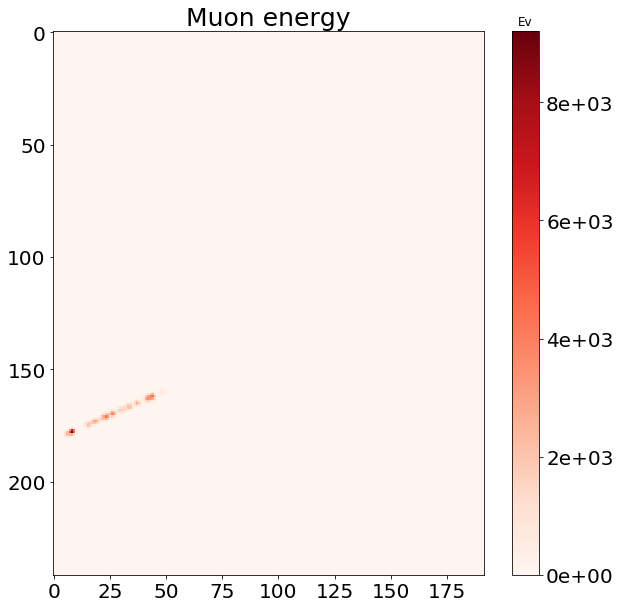

In [4]:
files = glob.glob1(mu_dir,"*13.npz")
mu_s = np.load(os.path.join(mu_dir, files[f]))['energy']

fig_mu_s = plt.figure(figsize=(10,10))
plt.imshow(mu_s, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('Ev')
plt.title("Muon energy", fontsize=25)

In [5]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a/cropped_tracks'
fig_mu_s.savefig(myPath + '/energy_mu_padded.png')

### Padding alphas

In [ ]:
#reshaping both energy and noise muon images, so they can be the same size
dest = a_dir

#list of the files in the original dataset
files = os.listdir(dest)

#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(dest, files[index]))['energy'] 
    noise_a = np.load(os.path.join(dest, files[index]))['noise']
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_a, noise=noise_a)

Text(0.5, 1.0, 'Alpha energy')

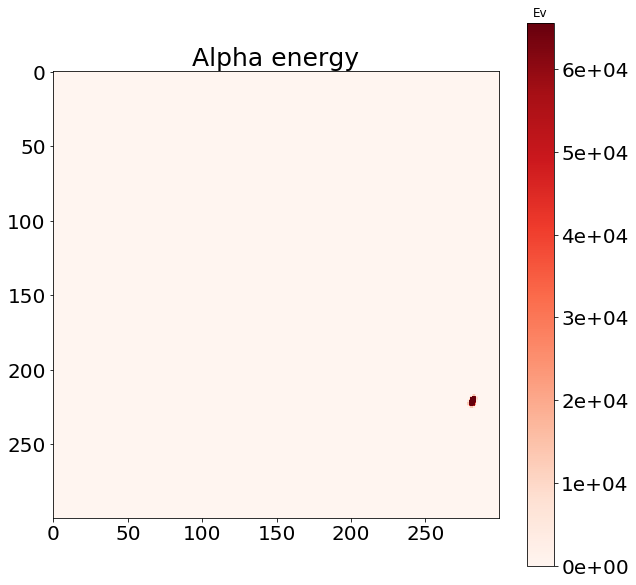

In [9]:
original_dataset_dir = '/gpfs/res_scratch/damic/TFM_DM/CCDimg_fullNoise'
files = glob.glob1(original_dataset_dir,"*1000020040.npz")
f=3453
mu = np.load(os.path.join(original_dataset_dir, files[f]))['energy']

fig_mu = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Alpha energy", fontsize = 25)

Text(0.5, 1.0, 'Alpha energy')

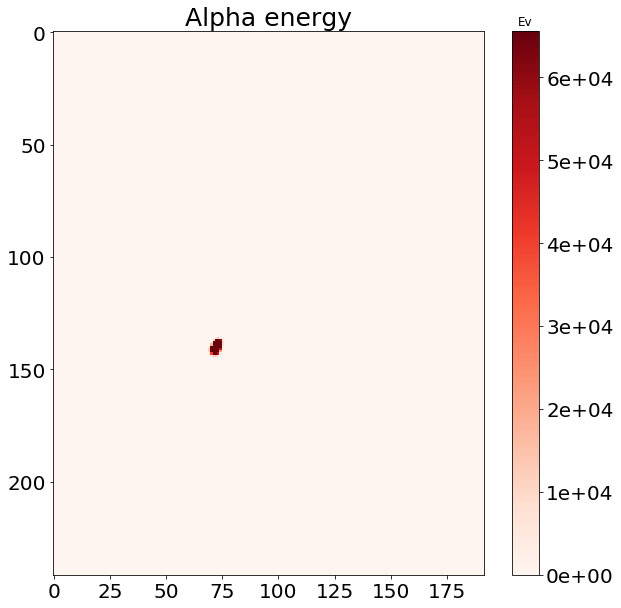

In [10]:
files = glob.glob1(a_dir,"*1000020040.npz")
a_s = np.load(os.path.join(a_dir, files[f]))['energy']

fig_a_s = plt.figure(figsize=(10,10))
plt.imshow(a_s, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('Ev')
plt.title("Alpha energy", fontsize=25)

In [11]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a/cropped_tracks'
fig_a_s.savefig(myPath + '/energy_a_padded.png')